In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
url = "/content/rolling_stones_spotify.csv"  # Change this to the URL where your CSV file is hosted
data = pd.read_csv(url)

In [3]:
# Initial Data Inspection
print(data.head())
print(data.describe())
print(data.info())

   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

In [4]:
# Checking for duplicates and missing values
print("Number of duplicates:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Missing values per column:\n", data.isnull().sum())
data.dropna(inplace=True)  # Adjust this line based on how you decide to handle missing data

Number of duplicates: 0
Missing values per column:
 Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


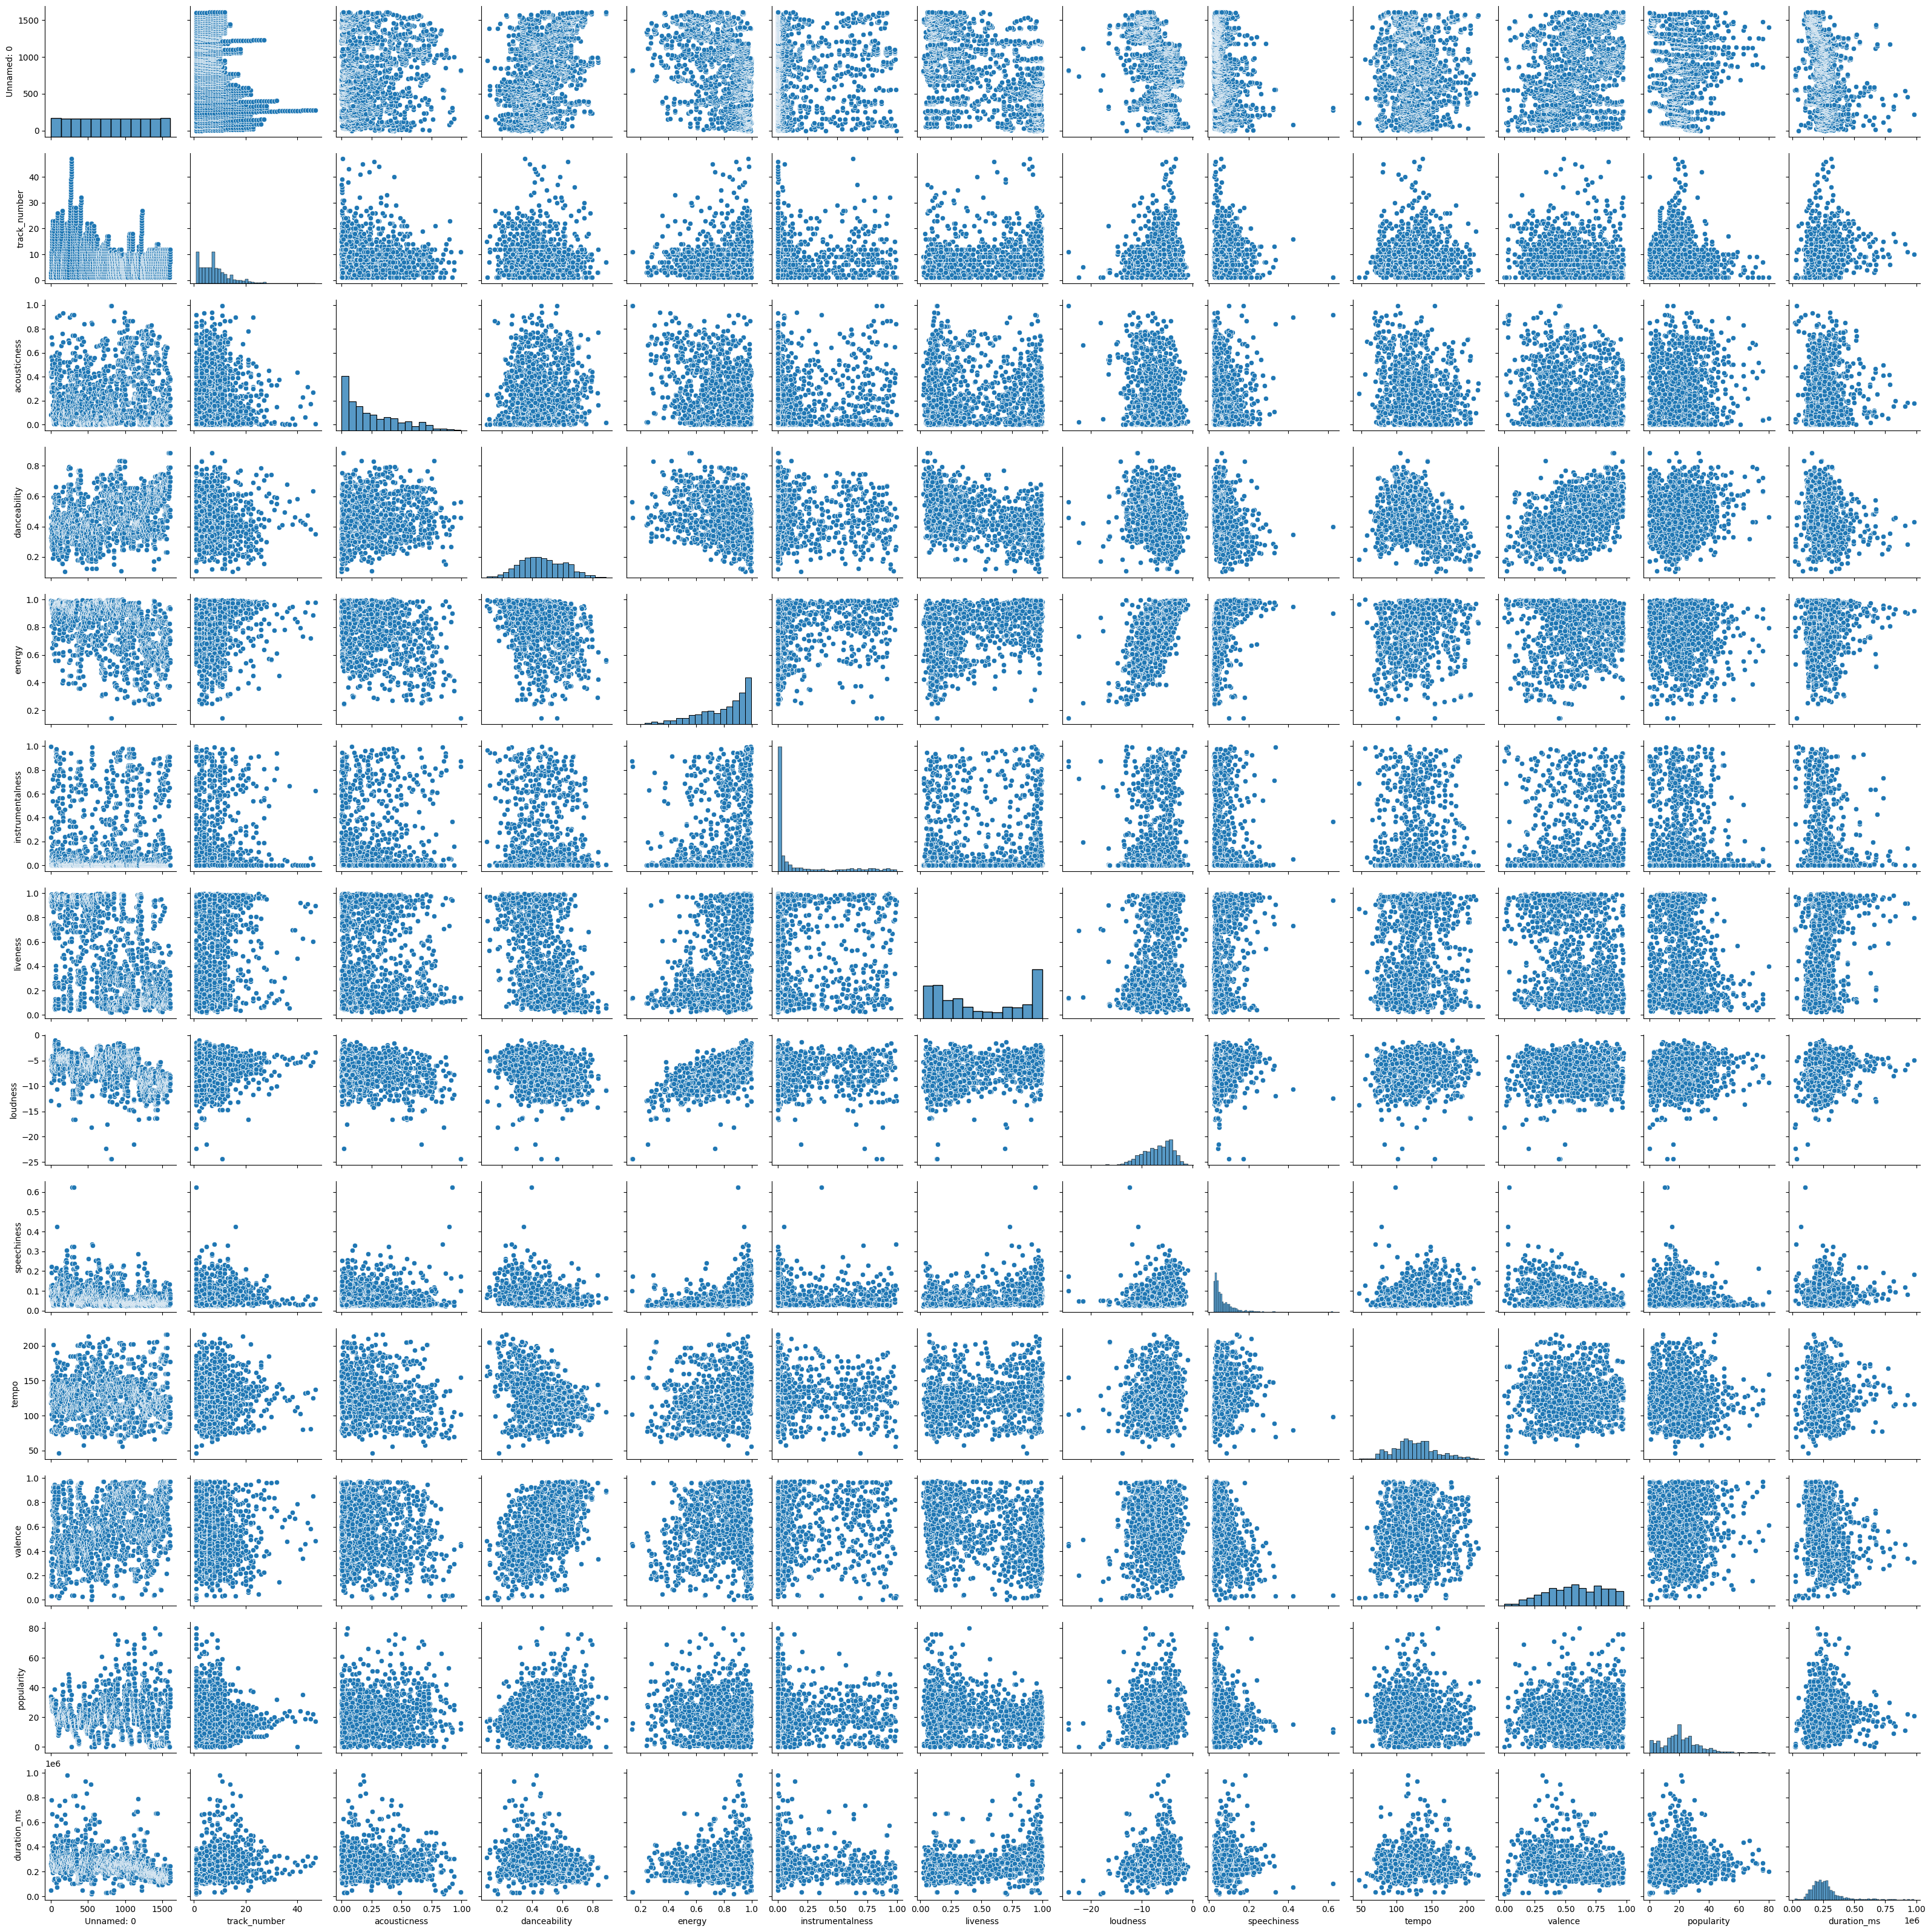

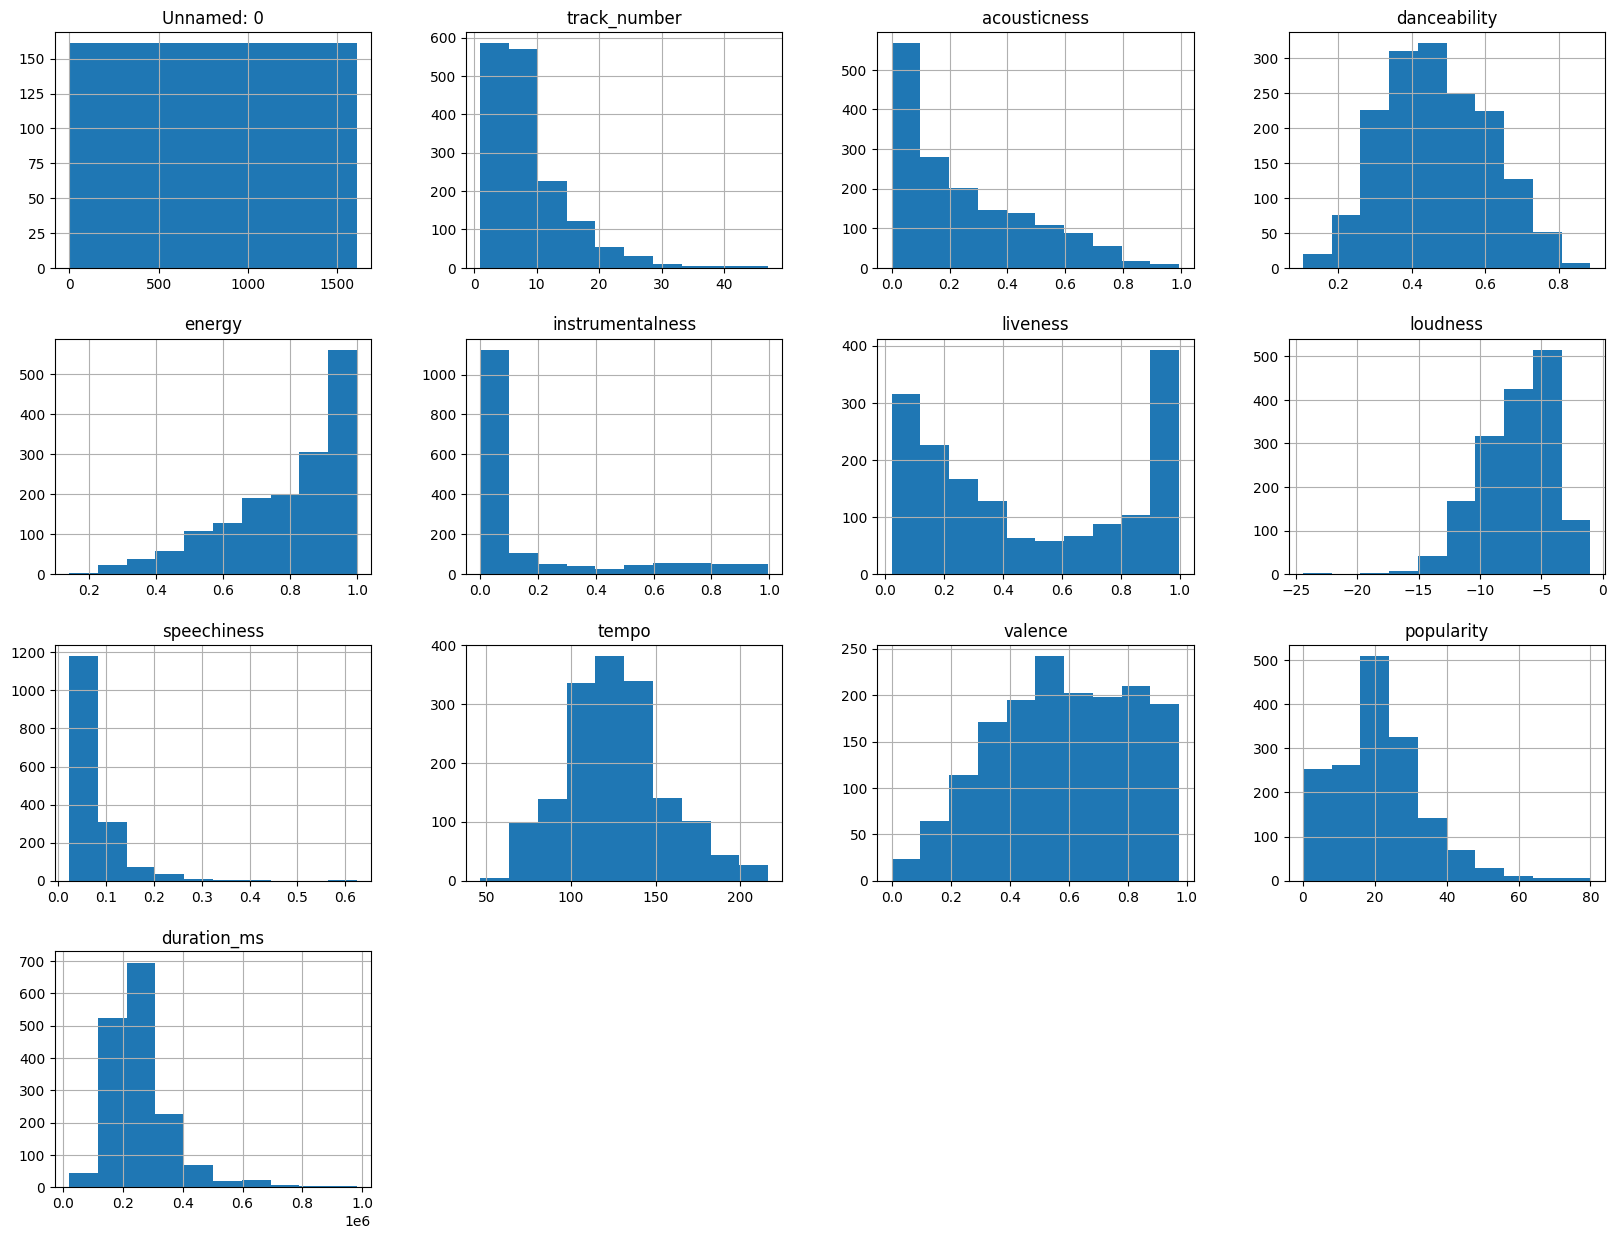

In [5]:
# Exploratory Data Analysis (EDA)
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

# Histograms for various features
data.hist(figsize=(20, 15))
plt.show()

In [6]:
# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']])

# Check scaled data
print(scaled_features[:5])

[[-0.73935481 -0.0413433   1.11576419  3.01209943  1.26155158 -1.98504535
   0.78440988 -0.27651662 -2.38759041  0.98299941]
 [ 0.82051776 -1.00796305  0.96006155  0.24923772  1.34464824  0.72454468
   0.12375349  0.18385207 -1.14267825  1.06349527]
 [ 0.72813952 -0.58462593  0.98230478  0.85395319  1.33032123  0.68010874
   0.88128032  0.1363233  -1.16430633  1.06349527]
 [ 1.39238306 -0.70457145  1.07127772 -0.59407965  1.15553171  0.47997995
   2.39245916  0.23651354 -1.88235852  0.90250356]
 [ 0.6577561  -1.17024228  0.98230478 -0.39205036  1.35897525  0.62598376
   0.45505039  0.1523031  -1.6271472   0.90250356]]


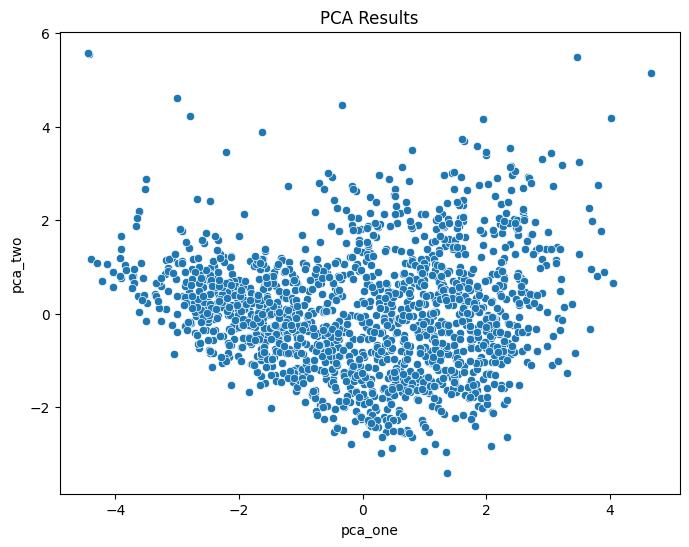

In [7]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data['pca_one'] = pca_result[:,0]
data['pca_two'] = pca_result[:,1]

# Plotting PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_one', y='pca_two', data=data)
plt.title('PCA Results')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

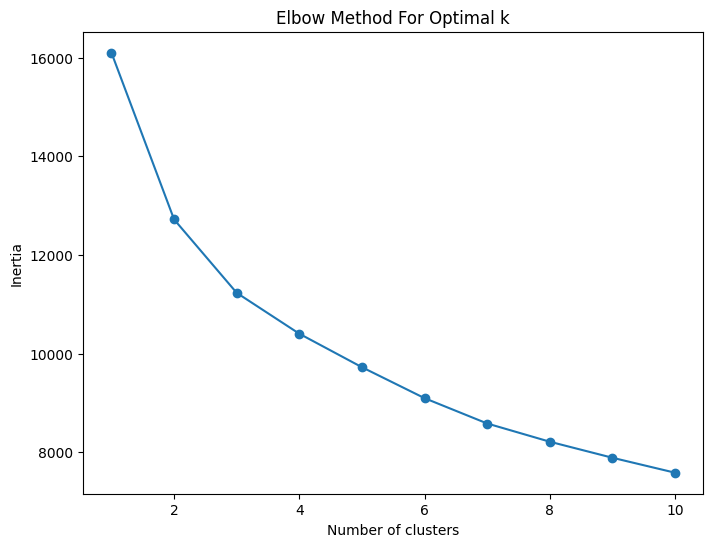

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


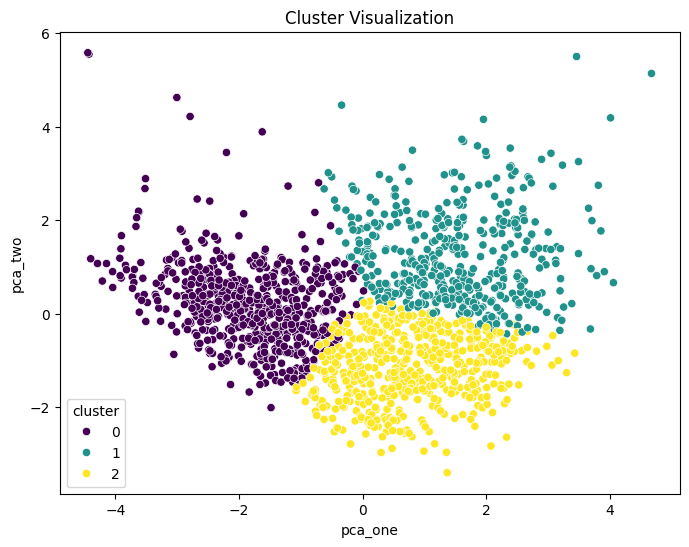

In [8]:
# Finding the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['cluster'] = clusters

# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=data, palette='viridis')
plt.title('Cluster Visualization')
plt.show()